### Information

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# Flipping a coin (non biased) 100 times
rand_coins = np.random.binomial(1, 0.5, 100)

rand_coins

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1])

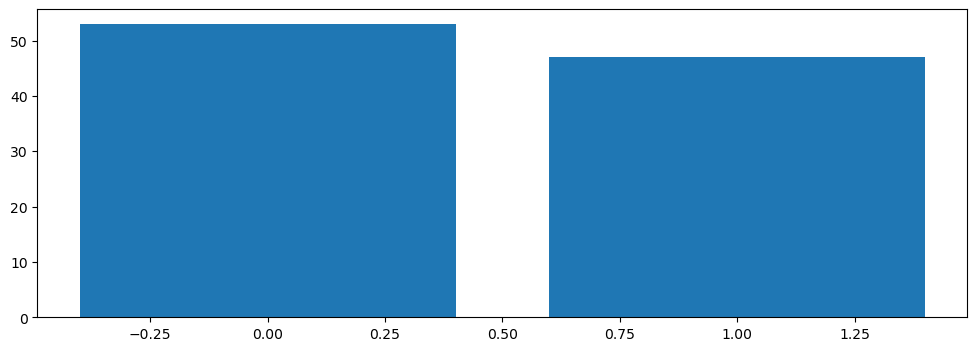

In [24]:
# Create an empty plot

fig, ax = plt.subplots(figsize=(12, 4))

x, counts = np.unique(rand_coins, return_counts=True)

ax.bar(x, counts);



In [25]:
x, counts

(array([0, 1]), array([53, 47]))

### Bernoulli Distribution

In [26]:
# The Bernoulli distribution is just the binomial with the first parameter as 1
# Remember binomial can be used for multiple coins as such by setting the first parameter

def bernoulli(p, size=None):
    return np.random.binomial(1, p, size)


In [27]:
bernoulli(0.5)

1

In [28]:
# Flipping an unfair coin

rand_coins = bernoulli(0.7, 100)

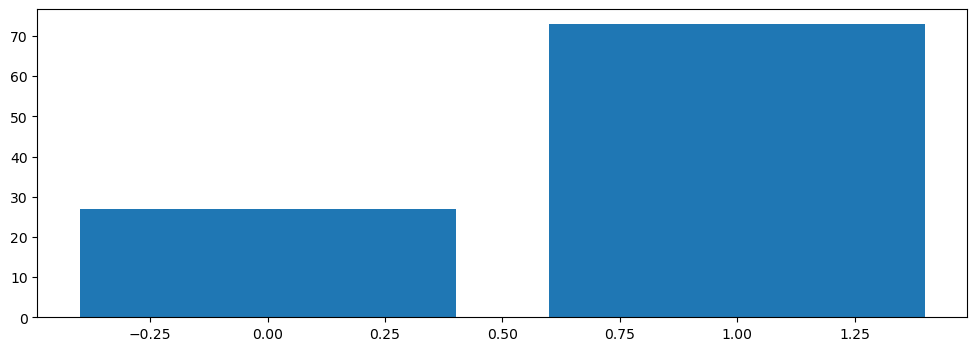

In [29]:
# Create a plot for the bernoulli

fig, ax = plt.subplots(figsize=(12, 4))

x, counts = np.unique(rand_coins, return_counts=True)

ax.bar(x, counts);

In [30]:
# Flipping two coins once each
rand_coins = np.random.binomial(2, .5)

rand_coins

# Will give the number of times heads (assuming heads is a successful trial) comes up

1

In [31]:
# Flipping two 100000 times to show the results - not .333 % chance of each outcome (2xheads, 1xheads, 0xheads)
rand_coins = np.random.binomial(2, .5, 100000)

rand_coins

array([1, 2, 2, ..., 2, 0, 1])

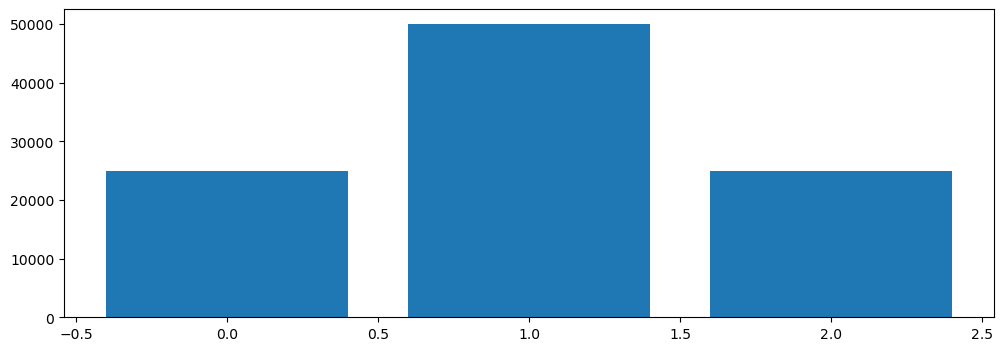

In [32]:
fig, ax = plt.subplots(figsize=(12, 4))

x, counts = np.unique(rand_coins, return_counts=True)

ax.bar(x, counts);

**Explanation**

Possibilities = HH, HT, TH, TT (so HT = TH = 50% chance)



**Dice Rolls**



In [34]:
# Default random number generator
rng = np.random.default_rng()

In [39]:
# Roll a single Dice

rng.integers(1, 7)

3

In [37]:
# Roll a single Dice
single_rolls = rng.integers(1, 7, 100000)

In [41]:
# Count the unique values

x, counts = np.unique(single_rolls, return_counts=True)

x, counts

(array([1, 2, 3, 4, 5, 6]), array([16588, 16602, 16609, 16839, 16846, 16516]))

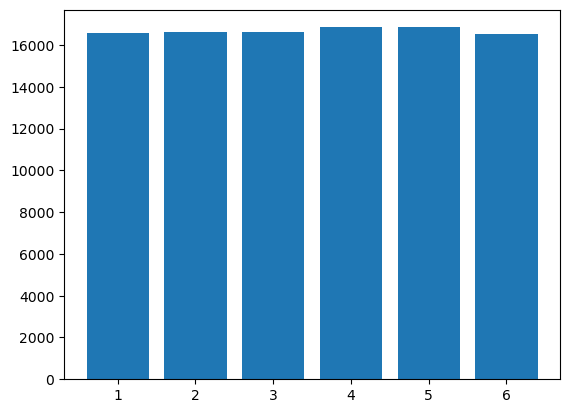

In [43]:
# Create a plot

fig, ax = plt.subplots()

ax.bar(x, counts);

In [45]:
# Roll two dice

double_rolls = rng.integers(1, 7, (100000, 2))

double_rolls

array([[4, 4],
       [6, 3],
       [4, 1],
       ...,
       [3, 6],
       [2, 1],
       [5, 5]])

In [49]:
# Sum the two dice

sum_double_rolls = double_rolls.sum(axis=1) #axis0 would sum the columns, axis1 sums by row

sum_double_rolls


array([ 8,  9,  5, ...,  9,  3, 10])

In [50]:
# Count the unique values

x, counts = np.unique(sum_double_rolls, return_counts=True)

x, counts

(array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([ 2786,  5654,  8391, 10902, 13845, 16683, 13918, 11240,  8281,
         5666,  2634]))

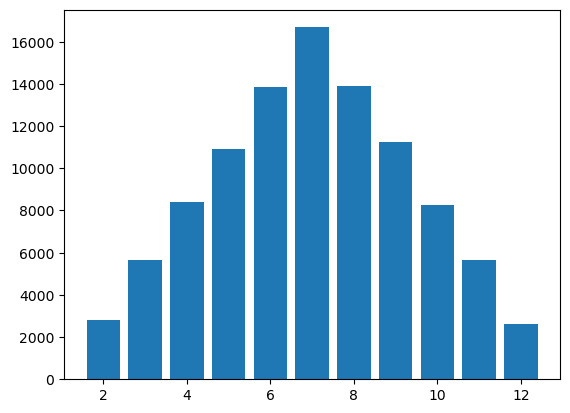

In [51]:
# Create a plot

fig, ax = plt.subplots()

ax.bar(x, counts);

In [54]:
# Plotting the individual rolls together to show how each roll is combined

individual_double_rolls = double_rolls[:,0] * 10 + double_rolls[:,1]

individual_double_rolls

array([44, 63, 41, ..., 36, 21, 55])

In [55]:
# Count the unique values

x, counts = np.unique(individual_double_rolls, return_counts=True)

x, counts

(array([11, 12, 13, 14, 15, 16, 21, 22, 23, 24, 25, 26, 31, 32, 33, 34, 35,
        36, 41, 42, 43, 44, 45, 46, 51, 52, 53, 54, 55, 56, 61, 62, 63, 64,
        65, 66]),
 array([2786, 2862, 2814, 2725, 2674, 2807, 2792, 2724, 2711, 2873, 2719,
        2825, 2853, 2711, 2726, 2790, 2812, 2858, 2755, 2738, 2817, 2796,
        2827, 2743, 2834, 2738, 2743, 2777, 2839, 2805, 2812, 2742, 2778,
        2699, 2861, 2634]))

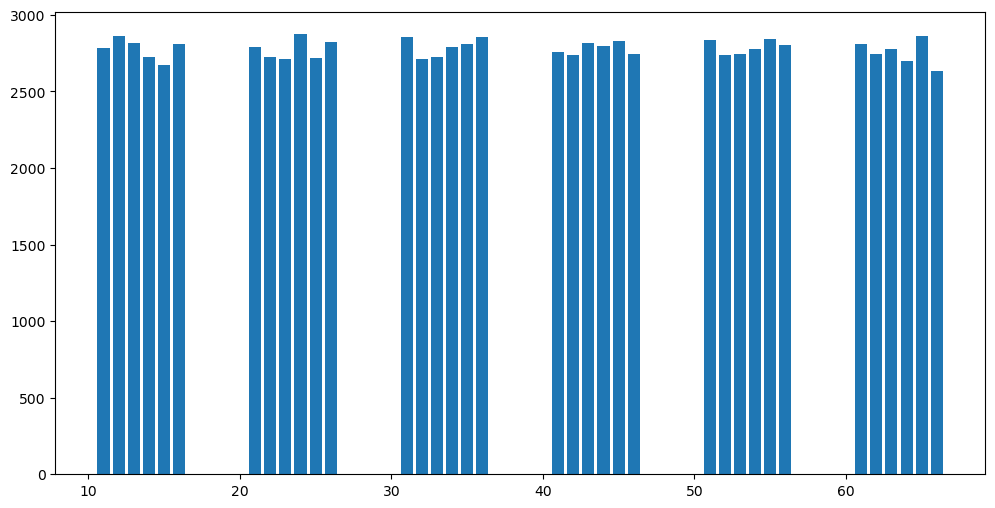

In [60]:
# Create a plot

fig, ax = plt.subplots(figsize=(12,6))

ax.bar(x, counts);

The first group is the 1,1 1,2 1,3 1,4 1,5 1,6 
Second group is 2,1 2,2 2,3 2,4 2,5 2,6 
etc...